   ## Stroke Prediction

**About Dataset:** This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Key Features:**

**age:** This is the age of the patient. Age is a crucial factor in stroke prediction as the risk of stroke increases with age.

**hypertension:** This is a binary feature indicating whether the patient has hypertension (high blood pressure) or not

**heart_disease:** This binary feature indicates whether the patient has heart disease or not. Patients with heart diseases are at a higher risk of stroke as these conditions can lead to the formation of clots in the heart that can travel to the brain.

**ever_married:** This feature represents whether the patient is married or not. Although not a direct risk factor for stroke, marital status can be associated with lifestyle factors that influence stroke risk.

**work_type:**This categorical feature describes the type of occupation of the patient. Certain occupations might be associated with higher stress levels or sedentary behavior, which can influence stroke risk.

**Residence_type:** This feature indicates whether the patient lives in a rural or urban area. The place of residence might be associated with stroke risk due to factors like access to healthcare, air quality, lifestyle habits, etc.

**avg_glucose_level:** This feature represents the average glucose level in the patient's blood. High blood glucose levels can damage blood vessels, leading to an increased risk of stroke.

**bmi:**This is the Body Mass Index of the patient, calculated as weight in kilograms divided by the square of height in meters. A high BMI indicates obesity, which is a significant risk factor for stroke as it can lead to or exacerbate conditions like hypertension, high blood glucose, and heart disease.

**smoking_status:** This categorical feature indicates whether the patient is a smoker, former smoker, or never smoked. Smoking can increase stroke risk as it can damage blood vessels, increase blood pressure, and reduce the amount of oxygen reaching the brain.

**gender:**This feature represents the gender of the patient. Gender can influence stroke risk due to biological differences and gender-specific lifestyle patterns.

#### Import Necessary Packages

In [33]:
import warnings
warnings.filterwarnings('ignore')

# basic libraries
import os
import pandas as pd
import numpy as np

#visulaization modules
import matplotlib.pyplot as plt
import seaborn as sns

#Common model helpers
from sklearn.preprocessing import (StandardScaler,LabelEncoder,OneHotEncoder)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,
                             classification_report,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,cross_val_score)

from imblearn.combine import SMOTETomek
# model algorithams
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

### Step 1 : Read the Data

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
raw_df=pd.read_csv('/content/healthcare_stroke_data.csv')
raw_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47356,Female,42.0,0,0,Yes,Private,Urban,87.40,24.5,formerly smoked,0
1,13236,Female,13.0,0,0,No,children,Rural,73.48,22.9,Unknown,0
2,3251,Male,54.0,0,0,Yes,Private,Urban,111.37,29.1,formerly smoked,0
3,35626,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked,1
4,36706,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,NaN,formerly smoked,1


In [35]:
# check the df structure
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5509 non-null   int64  
 1   gender             5509 non-null   object 
 2   age                5509 non-null   float64
 3   hypertension       5509 non-null   int64  
 4   heart_disease      5509 non-null   int64  
 5   ever_married       5509 non-null   object 
 6   work_type          5509 non-null   object 
 7   Residence_type     5509 non-null   object 
 8   avg_glucose_level  5509 non-null   float64
 9   bmi                5251 non-null   float64
 10  smoking_status     5509 non-null   object 
 11  stroke             5509 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 516.6+ KB


In [36]:
# No of rows are 5509
# No of columns are 12

In [37]:
raw_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
raw_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5509.000000,5509.000000,5509.000000,5509.000000,5509.000000,5251.000000,5509.000000
mean,36681.994917,45.048161,0.108913,0.064258,107.340670,28.976938,0.117626
std,21288.488575,22.951026,0.311558,0.245235,46.550243,7.747358,0.322194
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,27.000000,0.000000,0.000000,77.160000,23.800000,0.000000
50%,37086.000000,47.000000,0.000000,0.000000,92.170000,28.200000,0.000000
75%,54921.000000,63.000000,0.000000,0.000000,115.470000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Exploring Target Variable:**

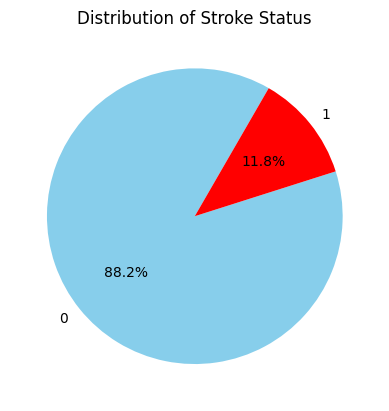

In [39]:
stroke_counts = raw_df['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['skyblue', 'red']

# Data for the pie chart
labels = stroke_counts['Stroke']
sizes = stroke_counts['Count']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=60)

# Add a title
ax.set_title('Distribution of Stroke Status')

# Show the plot
plt.show()

* The pie chart visually represents the distribution of stroke cases within the dataset, effectively categorizing them into "No Stroke" and "Stroke" categories.
* It illustrates the dataset's class imbalance, with a significantly larger number of "No Stroke" cases compared to "Stroke" cases.

### Step 2: Exploratory Data Analysis (EDA)


*   Find Features with unique value
*   Explore the Categorical Features and Numerical Features
*   Explore Categorical Feature Distribution
*   Explore Numerical Feature Distribution
*   Relationship between Categorical Features and Target Variable
*   Relation between numerical Features and Target Variable
*   Explore the Correlation between numerical features

**Note:**

- For any machine learning task, the most important thing is to investigate the data.
- The data itself can reveal many hidden secrets and helps massively in building an effective machine learning solution. Naturally, the first step is to see what the raw data looks like.

In [40]:
stroke_df = raw_df.copy()

**Find Features with one value:**

In [41]:
for column in stroke_df.columns:
    print(column,stroke_df[column].nunique())

id 5100
gender 3
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3972
bmi 418
smoking_status 4
stroke 2


Take Away: No feature has single value. Features with single unique value or very few unique values are typically not useful for machine learning models.

**Exploring the Categorical and Numerical Features:**

In [42]:
# Identifying number of categorical and numerical features
categorical_features = stroke_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = stroke_df.select_dtypes(exclude=['object']).columns.tolist()

print("Number of Categorical Variables:", len(categorical_features))
print("Number of Numerical Variables:", len(numerical_features))

Number of Categorical Variables: 5
Number of Numerical Variables: 7


In [43]:
numerical_features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [44]:
# Identifying possible values in each categorical feature
for idx, col in enumerate(stroke_df.select_dtypes(include='object').columns, start=1):
    unique_values = ", ".join(stroke_df[col].unique())
    print(f"{idx}. {col}: [{unique_values}]")

1. gender: [Female, Male, Other]
2. ever_married: [Yes, No]
3. work_type: [Private, children, Self-employed, Govt_job, Never_worked]
4. Residence_type: [Urban, Rural]
5. smoking_status: [formerly smoked, Unknown, never smoked, smokes]


**Exploring Categorical Features Distribution:**

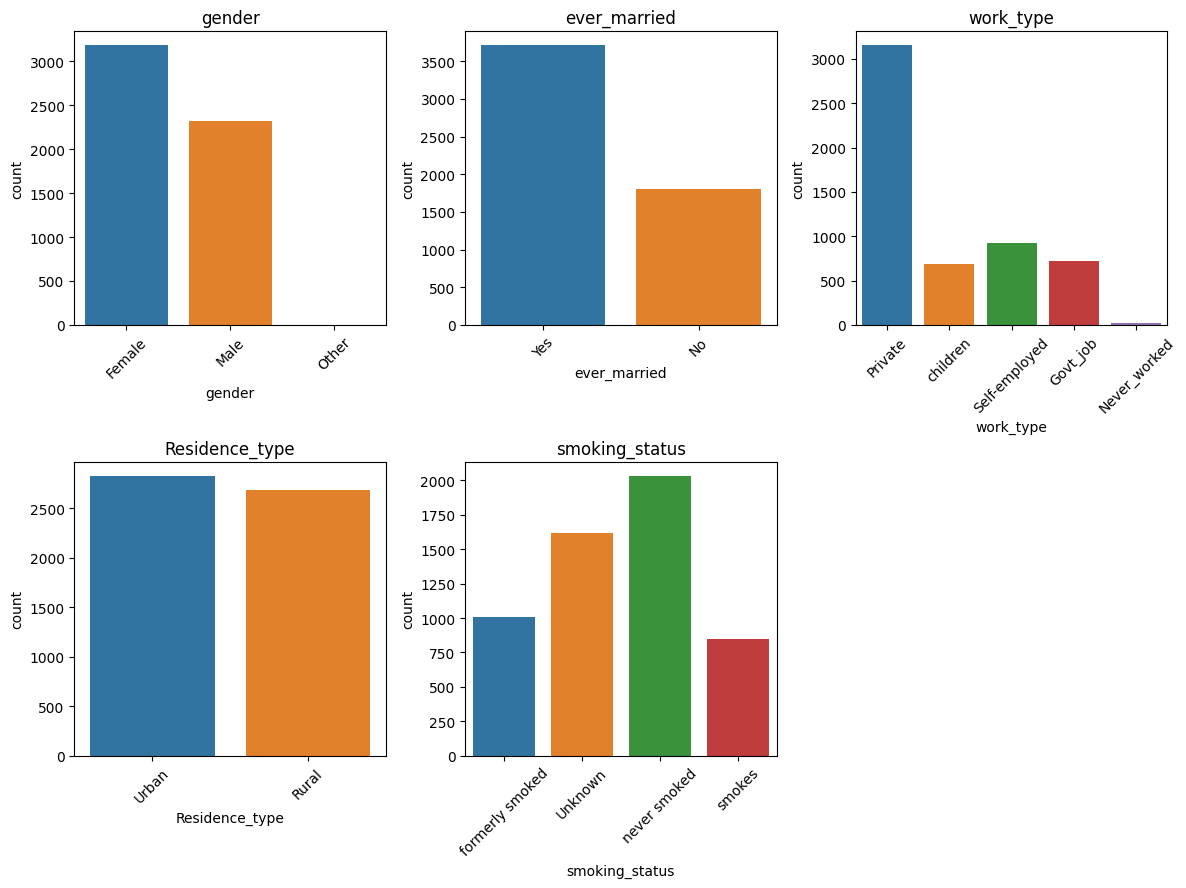

In [45]:
plt.figure(figsize=(12,25), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(6,3,plotnumber)
    sns.countplot(x=categorical_feature,data=stroke_df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plt.xticks(rotation=45)
    plotnumber+=1

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

**Take Away :**

**1.Gender Distribution:**  The proportion of female patients appears to be slightly higher, indicating a marginally greater representation of females in the dataset. This could suggest a need to consider gender-specific factors in stroke risk assessment.

**2.Marital Status:** The marital status chart illustrate a predominance of married individuals in the dataset.

**3.Work Type:** The work type chart likely displays a diverse distribution, reflecting various occupational backgrounds. There are
more "Private" and "Self-employed" individuals compared to other work types.

**4.Residence Type:** we can observe that the dataset contains a higher number of individuals from urban areas ("Urban") compared to rural areas ("Rural").

**5.Smoking Status:** The smoking status chart categorizes patients by their smoking habits. It's likely to reveal that non-smokers form the majority, with smokers and former smokers constituting significant but smaller portions.

**Exploring Numeric Features Distribution:**

We have two types of numeric features

1) Discrete numeric features

2) Continuous numeric features.


In [46]:
discrete_numeric_features=['hypertension','heart_disease']
continuous_numeric_features=['age','avg_glucose_level','bmi']

**Exploring Discrete Numeric features:**

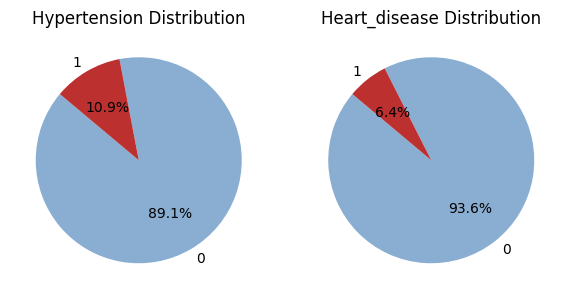

In [47]:
# Number of discrete numeric features
num_features = len(discrete_numeric_features)

# Custom colors
colors = ['#89AED2', '#BC3030']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(num_features * 3, 3))  # Adjust the size as needed

# Iterate over each discrete numeric feature to create pie charts
for i, feature in enumerate(discrete_numeric_features):
    feature_counts = stroke_df[feature].value_counts()

    # Plot pie chart in the ith subplot with custom colors
    axes[i].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'{feature.capitalize()} Distribution')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


**1.Hypertension:** The "0" category (representing patients without hypertension) occupies the majority, accounting for approximately 89.1% of the dataset. The "1" category (representing patients with hypertension) constitutes a smaller proportion, making up around 10.9% of the dataset.
**2.Heart Disease:** The "0" category (representing patients without heart disease) occupies the majority. The "1" category (representing patients with heart disease) constitutes a smaller proportion, making up around 6.4% of the dataset.

**Exploring Continuous Numeric features:**

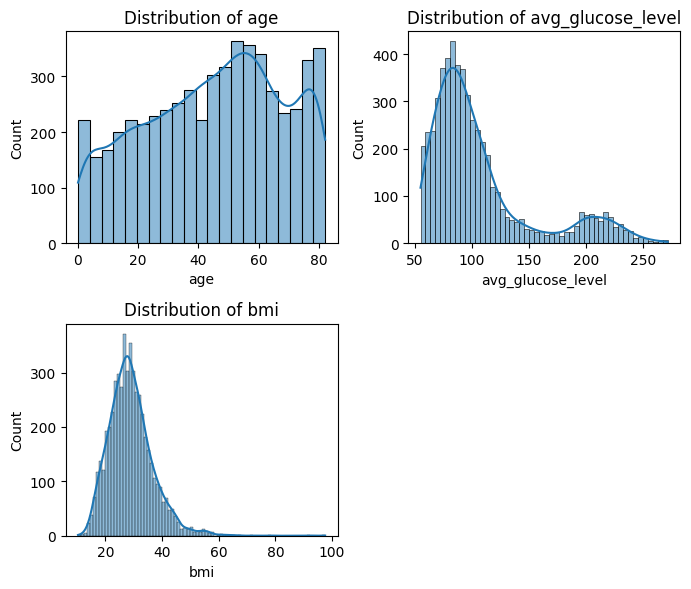

In [48]:
# Create the figure with specified size and background color
plt.figure(figsize=(7, 6), facecolor='white')
# Initialize a counter for the subplot index
subplot_index = 1
# Plotting only specified numerical features
for col in continuous_numeric_features:
    plt.subplot(2, 2, subplot_index)  # Adjust the subplot grid and index as needed
    sns.histplot(stroke_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    subplot_index += 1  # Increment the subplot index

plt.show()

**1.Age Distribution:** The distribution appears roughly bell-shaped, which is common in a diverse population, but there's a noticeable presence of older individuals, reflecting the natural demographic where stroke risk is generally higher.

**2.Average Glucose Level:** The histogram for average glucose level depicts a right-skewed distribution, meaning there are a considerable number of individuals with glucose levels higher than the mode.Most individuals have glucose levels in a lower range, but the long tail to the right suggests a non-negligible group with elevated glucose levels, which can be a concern for health risks such as diabetes and possibly stroke.

**3.BMI Distribution:** The histogram for BMI reveals a sharp peak in the lower-to-middle range, suggesting that most patients have a BMI that falls within a healthy or slightly overweight range. The right skew indicates fewer patients with a high BMI, but this tail suggests the presence of individuals at risk due to obesity.

**Exploring Relation Between Discrete Numerical Features and Target:**

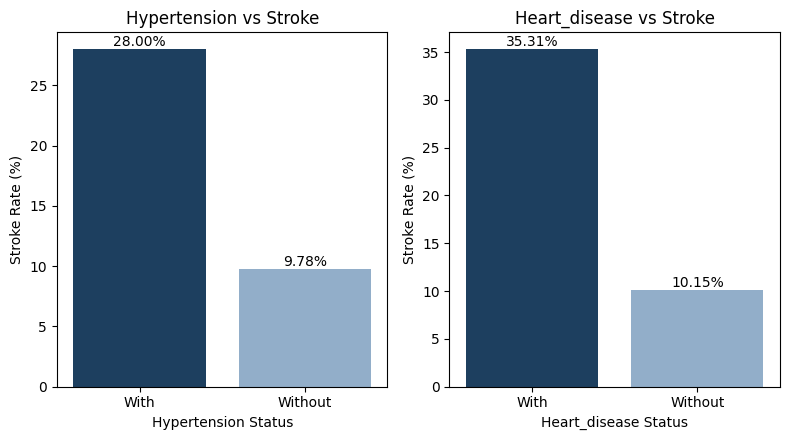

In [49]:
# Calculate stroke rates for each feature
stroke_rates = {}
for feature in discrete_numeric_features:
    stroke_rate_with_feature = (stroke_df[stroke_df[feature] == 1]['stroke'].mean()) * 100
    stroke_rate_without_feature = (stroke_df[stroke_df[feature] == 0]['stroke'].mean()) * 100
    stroke_rates[feature] = [stroke_rate_with_feature, stroke_rate_without_feature]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(discrete_numeric_features), figsize=(8,4.5))
if len(discrete_numeric_features) == 1:  # If there's only one feature, wrap it in a list to make the iteration work
    axes = [axes]

for i, feature in enumerate(discrete_numeric_features):
    data = pd.DataFrame({
        feature: ['With', 'Without'],
        'Stroke Rate': stroke_rates[feature]
    })
    sns.barplot(x=feature, y='Stroke Rate', data=data, ax=axes[i], palette=["#123F6A", "#89AED2"])
    axes[i].set_title(f'{feature.capitalize()} vs Stroke')
    axes[i].set_xlabel(f'{feature.capitalize()} Status')
    axes[i].set_ylabel('Stroke Rate (%)')
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f%%')

plt.tight_layout()
plt.show()


**Take away :**
It's evident from the bar charts that individuals with hypertension have a significantly higher stroke rate compared to those without hypertension. Similarly, individuals with heart disease also exhibit a higher stroke rate than those without heart disease.

**Exploring Relation Between Continuous Numerical Features and Target:**

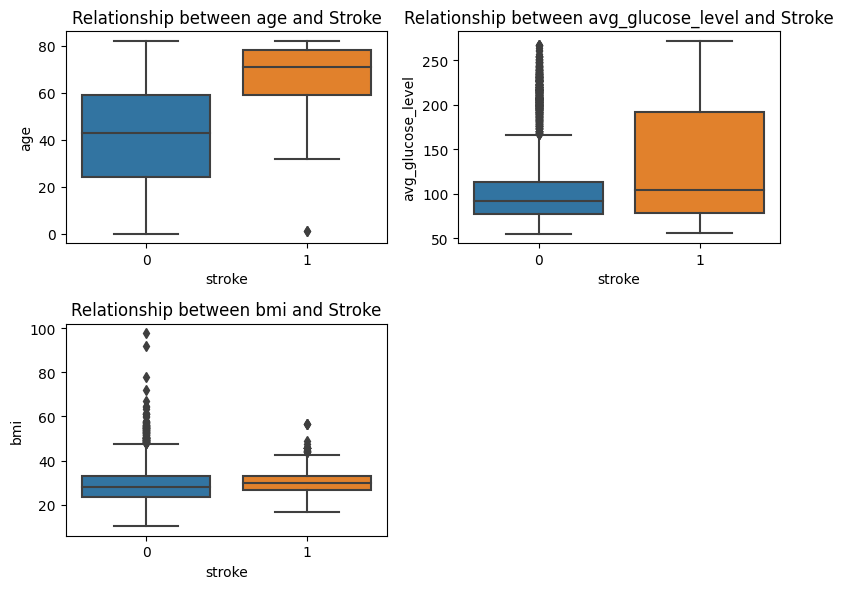

In [50]:
plt.figure(figsize=(8, 6))
# Plotting the relationship between numerical features and stroke status
for i, col in enumerate(continuous_numeric_features, start=1):
    plt.subplot(2, 2, i)  # Adjusted the grid size and used 'i' directly
    sns.boxplot(data=stroke_df, x='stroke', y=col)
    plt.title(f'Relationship between {col} and Stroke')
    plt.tight_layout()

plt.show()


**Take Away:**
1. Age vs Stroke: This visualization suggests that the risk of stroke tends to increase with age, with a more significant concentration of stroke cases in the older population.
2. Glucose Level vs Stroke: Individuals who have higher average glucose levels tend to have high stroke chances


In [51]:
stroke_df['heart_disease'].value_counts()

0    5155
1     354
Name: heart_disease, dtype: int64

In [52]:
stroke_df['hypertension'].value_counts()

0    4909
1     600
Name: hypertension, dtype: int64

**Exploring Relation Between Categorical Features and Target:**

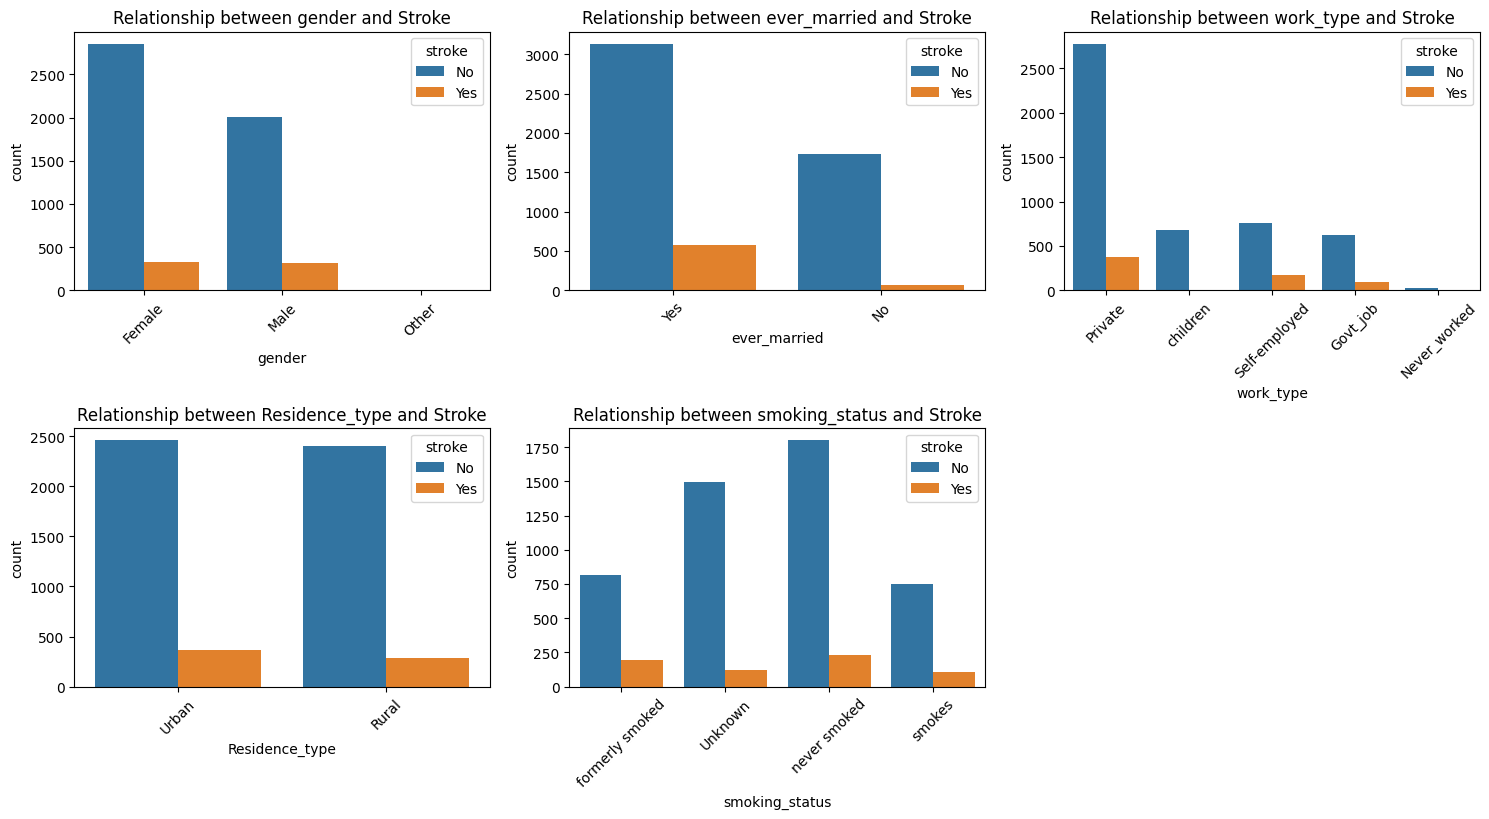

In [53]:
plt.figure(figsize=(15, 15))

stroke_df['stroke'] = stroke_df['stroke'].replace({1:'Yes', 0: 'No'})
# Plotting the relationship between categorical features and subscription status
for i, col in enumerate(categorical_features, 1):  # Excluding 'y' since it's the target
    plt.subplot(4, 3, i)
    sns.countplot(data=stroke_df, x=col, hue='stroke')
    plt.title(f'Relationship between {col} and Stroke')
    plt.xticks(rotation=45)
    plt.tight_layout()


plt.show()

**Notes:**
1. Gender vs Stroke: Among the genders, females have a higher count of both stroke and non-stroke cases than males
2. Relationship between Ever Married vs Stroke: Individuals who have ever been married show a higher count of both stroke and non-stroke cases than those who have never been married.
3. Work Type vs Stroke: "Private" and "Self-employed" individuals seem to have relatively higher stroke rates compared to other work types.
4. Residence Type vs Stroke: The count of stroke cases  is higher in urban areas compared to rural areas



**Explore the Correlation between numerical features**

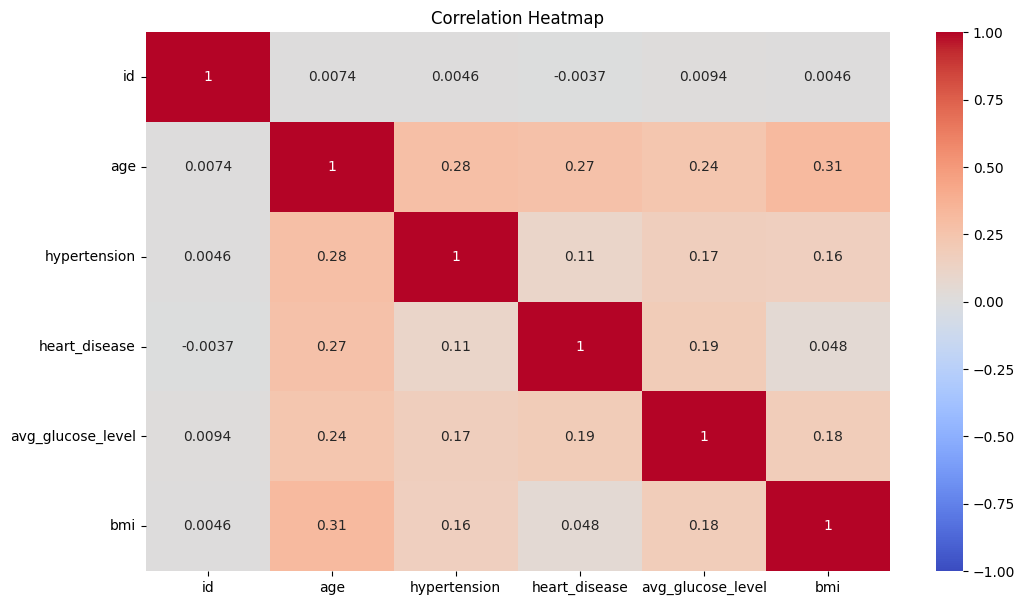

In [54]:
cor_mat=stroke_df.corr(numeric_only=True)
fig = plt.figure(figsize=(12,7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Exploring Null Values**

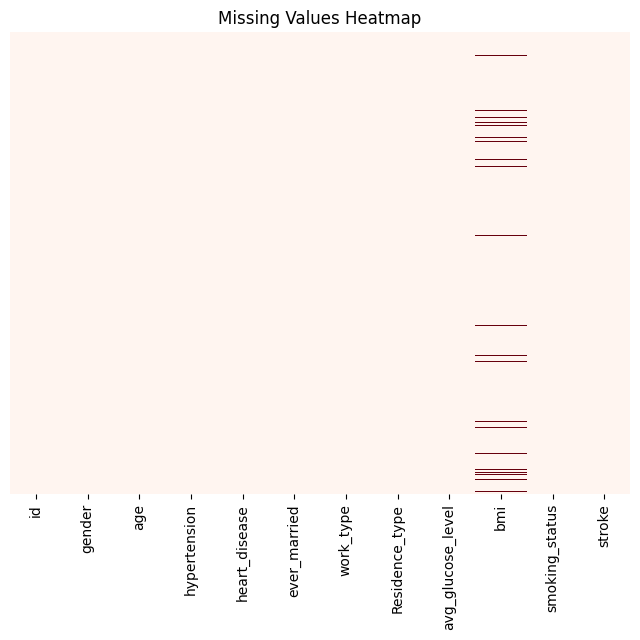

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

Take Away :  'BMI' column has Missing Values

### Step 3: Feature Engineering


*   Drop unwanted Features
*   Handle Missing Values
*   Drop Duplicates
*   Remove Outliers
*   Label Encoding
*   Feature Scaling



In [5]:
df=raw_df.copy()

**Drop unwanted Features :**

In [6]:
# Drop identifier column
df.drop(columns = ['id'], inplace=True)
df.shape

(5509, 11)

**Handling Missing Values:**

In [7]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

bmi    4.683246
dtype: float64

In [8]:
# Impute missing values in 'bmi' and smoking_status with median
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

The missing values in the bmi column have been successfully imputed with the median value.
There are no missing values left in the dataset.

In [9]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [10]:
column_values = df['smoking_status'].dropna()
random_values = np.random.choice(column_values, size=df['smoking_status'].isnull().sum(), replace=True)
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = random_values

we replaced 'Unknown' values in the 'smoking_status' column with nulls to make the data more consistent.

In [11]:
# Check if there are any missing values left
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Drop Duplicates**

In [12]:
#Duplicates in the dataset can skew the analysis. We identified and removed duplicate rows to ensure data integrity.
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0,0,Yes,Private,Urban,87.40,24.5,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,73.48,22.9,never smoked,0
2,Male,54.0,0,0,Yes,Private,Urban,111.37,29.1,formerly smoked,0
3,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked,1
4,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,28.2,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5504,Male,35.0,0,0,Yes,Private,Rural,145.18,32.6,smokes,0
5505,Male,58.0,0,0,Yes,Private,Urban,69.24,27.6,never smoked,0
5506,Female,45.0,0,0,Yes,Private,Rural,81.02,39.0,never smoked,0
5507,Female,66.0,0,0,Yes,Govt_job,Rural,152.02,44.2,formerly smoked,0


**Remove Outliers**

In [13]:
numerical_cols=['age','avg_glucose_level', 'bmi']
for col in numerical_cols:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # IQR is Q3 - Q1
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the DataFrame to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Resulting DataFrame without outliers
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0,0,Yes,Private,Urban,87.40,24.5,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,73.48,22.9,never smoked,0
2,Male,54.0,0,0,Yes,Private,Urban,111.37,29.1,formerly smoked,0
3,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked,1
4,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,28.2,formerly smoked,1


**Label Encoding:**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4679 entries, 0 to 5508
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4679 non-null   object 
 1   age                4679 non-null   float64
 2   hypertension       4679 non-null   int64  
 3   heart_disease      4679 non-null   int64  
 4   ever_married       4679 non-null   object 
 5   work_type          4679 non-null   object 
 6   Residence_type     4679 non-null   object 
 7   avg_glucose_level  4679 non-null   float64
 8   bmi                4679 non-null   float64
 9   smoking_status     4679 non-null   object 
 10  stroke             4679 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 438.7+ KB


In [15]:
df['work_type'].value_counts()

Private          2644
Self-employed     742
children          676
Govt_job          595
Never_worked       22
Name: work_type, dtype: int64

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()
for column in categorical_cols:
    if column in df.columns:
        df[column] = encoder.fit_transform(df[column])

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,42.0,0,0,1,2,1,87.40,24.5,0,0
1,0,13.0,0,0,0,4,0,73.48,22.9,1,0
2,1,54.0,0,0,1,2,1,111.37,29.1,0,0
3,1,81.0,0,0,1,3,1,99.33,33.7,1,1
4,0,76.0,0,0,1,3,1,106.41,28.2,0,1


**Feature Scaling:**

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,-0.025811,0,0,1,2,1,-0.183106,-0.517557,0,0
1,0,-1.285601,0,0,0,4,0,-0.786333,-0.768503,1,0
2,1,0.495481,0,0,1,2,1,0.855641,0.203914,0,0
3,1,1.668389,0,0,1,3,1,0.333884,0.925385,1,1
4,0,1.451184,0,0,1,3,1,0.640698,0.062757,0,1


#Model Training & Performance Evaluation

**Train test split:**

Splitting the data into 80% training data and 20% test data

In [20]:
def get_train_test_splits(df, target_column, test_size=0.2, random_state=42):
    """
    splits the Data into training and test samples
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = get_train_test_splits(df, 'stroke', test_size=0.2, random_state=42)

**Balancing Data Set:**

In [22]:
def get_dataset_balanced(X_train, y_train, random_state=42):
    """
    makes Dataset Balanced
    """
    smt = SMOTETomek(random_state=random_state)
    X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
    return X_resampled, y_resampled


In [23]:
X_resampled, y_resampled = get_dataset_balanced(X_train, y_train)

**Model Training:**

* *To create Base model we need to check with all algorithms to understand which algorithm fits best for this dataset.*

In [24]:
# Instantiation
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
decision_tree_clf = DecisionTreeClassifier(random_state=42)
naive_bayes_clf = GaussianNB()
xgb_clf = XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=50, subsample=1.0,random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=80, subsample=1.0,random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
classifiers = {
    'Logistic Regression': logistic_clf,
    'SVM': svm_clf,
    'KNN': knn_clf,
    'Decision Tree': decision_tree_clf,
    'Naive Bayes': naive_bayes_clf,
    'Gradient Boosting': gradient_boosting_clf,
    'XGBoost': xgb_clf
}

**Training:**

In [26]:
# Training the Classifiers
trained_classifiers = {}

for name, clf in classifiers.items():
    clf.fit(X_resampled, y_resampled)
    trained_classifiers[name] = clf

**Performance Evaluation:**

In [27]:
def evaluate_classifier_metrics(classifier, X_test, y_test):
    """
    Evaluates a classifier's performance and returns various classification metrics.
    """
    # Predict
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Check if classifier can predict probabilities
    if hasattr(classifier, 'predict_proba'):
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = 'N/A'

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

In [28]:
# Evaluating Classifier Performance
results = pd.DataFrame()

for name, clf in trained_classifiers.items():
    metrics = evaluate_classifier_metrics(clf, X_test, y_test)
    results[name] = pd.Series(metrics)

# Transpose for better view
results = results.T

# Print the results table
print(results)


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.737179   0.253968  0.879121  0.394089  0.874140
SVM                  0.784188   0.301075  0.923077  0.454054  0.889590
KNN                  0.863248   0.407035  0.890110  0.558621  0.939450
Decision Tree        0.886752   0.457627  0.890110  0.604478  0.888250
Naive Bayes          0.717949   0.232198  0.824176  0.362319  0.835061
Gradient Boosting    0.934829   0.615385  0.879121  0.723982  0.959945
XGBoost              0.893162   0.473054  0.868132  0.612403  0.940828


Note:
* This is higly imbalanced dataset we have 88.2% data points belong to the 'No Stroke' class and 11.8% to the 'Stroke' class.And hence we can see low values for Precision and f1 score.

* Gradient Boosting has the highest accuracy among other algorithms at 90.17%. So, performing hyperparameter tuning on gradient boosting to improve more.

**Hyper Parameter Tuning:**

In [29]:
# Define the classifier
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.8],
    'max_depth': [3, 2, 5],
    'subsample': [0.9, 0.7, 1.0],
}

# Grid search
grid_search = GridSearchCV(estimator=gradient_boosting_clf, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)

grid_search.fit(X_resampled, y_resampled)

# Extract best hyperparameters and their corresponding score
gb_best_params = grid_search.best_params_
gb_best_score = grid_search.best_score_

gb_best_params, gb_best_score


Fitting 3 folds for each of 81 candidates, totalling 243 fits


({'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0},
 0.9609925399412211)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the classifier
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.8],
    'max_depth': [3, 2, 5],
    'subsample': [0.9, 0.7, 1.0],
}

# Grid search with more detailed cross-validation steps
grid_search = GridSearchCV(
    estimator=gradient_boosting_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3, #3-fold cross-validation
    verbose=2,
    return_train_score=True
)

# Fit the grid search model
grid_search.fit(X_resampled, y_resampled)

# Extract best hyperparameters, their corresponding score, and detailed CV results
gb_best_params = grid_search.best_params_
gb_best_score = grid_search.best_score_
cv_results = grid_search.cv_results_

# Detailed CV results
for mean_train, mean_test, params in zip(cv_results['mean_train_score'], cv_results['mean_test_score'], cv_results['params']):
    print(f"Train Score: {mean_train:.3f}, Test Score: {mean_test:.3f} with: {params}")

# Best model performance
print(f"Best parameters: {gb_best_params}")
print(f"Best cross-validation score: {gb_best_score:.3f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=3, n_estimators=150, subsample=0.9; total time=   1.3s
[CV] END

In [31]:
# Best parameters obtained from the randomized search
best_params = {
    'learning_rate': 0.3,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 1.0
}

# Initialize the XGBoost classifier with the best parameters
gradient_boosting_clf = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model with your training data
gradient_boosting_clf.fit(X_resampled, y_resampled)


GradientBoostingClassifier(learning_rate=0.3, max_depth=5, n_estimators=200,
                           random_state=42)

Gradient Boosting:
-----------------
Accuracy: 0.9551
Precision: 0.7168
Recall: 0.8901
F1 Score: 0.7941
Confusion Matrix:
[[813  32]
 [ 10  81]]
-----------------


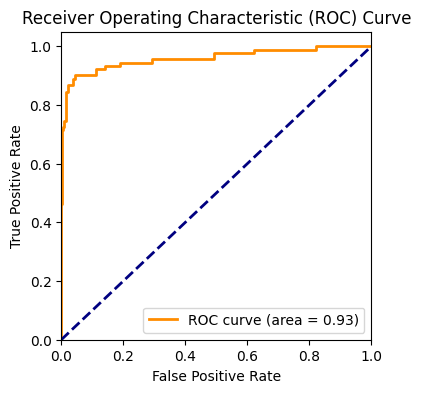

Confusion Matrix:
-----------------


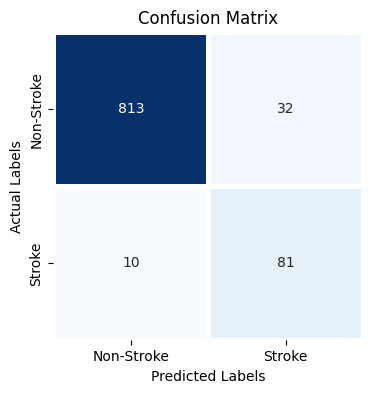

Classification Report:
-----------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       845
           1       0.72      0.89      0.79        91

    accuracy                           0.96       936
   macro avg       0.85      0.93      0.88       936
weighted avg       0.96      0.96      0.96       936



In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that X_test, y_test, and gradient_boosting_clf are already defined and gradient_boosting_clf has been fitted to the training data

# Making predictions on the test dataset
y_pred = gradient_boosting_clf.predict(X_test)

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gradient_boosting_clf.predict_proba(X_test)[:, 1])

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Gradient Boosting:")
print("-----------------")
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("-----------------")
# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:")
print("-----------------")
# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Non-Stroke', 'Stroke'])
plt.yticks([0.5, 1.5], ['Non-Stroke', 'Stroke'], va='center')
plt.show()

# Print Classification Report
print("Classification Report:")
print("-----------------")
print(class_report)


Note: After hyper parameter tuning we can see that performance of the model got improved.
Accuracy increased from 90.17% to 95.41%

Precision: Improved from 49.69% to 70.34%, meaning that after tuning, when the model predicts a stroke, it is more likely to be correct.

Recall slightly increased from 89.01% to 91.21%, indicating that the model is able to identify a higher percentage of actual stroke cases.
In summary, hyperparameter tuning has resulted in a model that is more accurate and precise.

Overall, the hyperparameter tuning has resulted in a more accurate and precise model with a minimal recall trade-off. The high ROC-AUC score suggests that the model has a good measure of separability and can effectively distinguish between the positive and negative classes. The improvement in precision is particularly noteworthy because it suggests a reduction in false positives, which is crucial in medical diagnostics to avoid unnecessary treatments or interventions.